## Subject 1: MNIST Clustering
###### <p style="float:right">Gînga Raluca-Andreea</p>


1. Download the MNIST data set using the code below.
2. Ignoring the label normally associated to the dataset, construct a clustering of the data. Your clustering should maximize the v-score measure relative to true data labels (
    Paper describing the measure: https://www.aclweb.org/anthology/D07-1043.pdf
    Implementation available in python: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score
). Note that failing to ignore the labels during training will void your score for this subject.

#### Importing the necessary libraries

In [106]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import binary

from time import time
from sklearn.datasets import fetch_openml
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, svm, metrics
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering, Birch
from sklearn import neighbors
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.decomposition import  KernelPCA
from sklearn.utils import shuffle
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.manifold import Isomap
from sklearn import (manifold, datasets, decomposition)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import scipy.sparse as sp
from sklearn import cluster
from sklearn.cluster import DBSCAN
from sklearn.externals.six import string_types
from sklearn.utils import check_array, check_random_state
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import _joint_probabilities, _joint_probabilities_nn
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import NearestCentroid
from sklearn.decomposition import PCA as RandomizedPCA
from statistics import mode 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# For CNN
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical

In [52]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

#### Shape of our data

In [53]:
print(X.shape, y.shape)

(70000, 784) (70000,)


#### Data Exploration

In [54]:
X, y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

Let's see how a sample look like.

In [55]:
X[0],y[0]

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

We notice that the type of 'y' label is 'object', so we'll convert it into an 'int' to avoid problems.

In [56]:
y = y.astype(int)

In [57]:
y.dtype

dtype('int32')

Let's plot the first sample to ensure it display '5' digit.

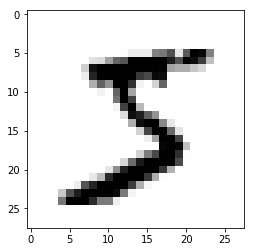

In [58]:
plt.imshow(X[0].reshape(28, 28), cmap=binary, interpolation="nearest")
plt.axis('on')
plt.show()

## 1) K-Means on a small dataset (2000 samples)

Wanted to put a smaller set of data because of the large volume of data and in order to save precious time computing the clusters.

In [59]:
no_samples, no_features = X.shape
no_digits = len(np.unique(y)) # length of the unique values of 'y': 0, 1, ..., 9
labels = y[:2000] # our labels are the 'y' values

In [60]:
print(75 * '_')
print('init\t\tinertia\t\thomo\tcompl\tv-meas')



def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s \t %i \t %.3f \t %.3f \t%.3f\t'
          % (name, estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_)
         ))
    
no_clusters = [10, 20, 30, 50, 80, 100, 110, 120, 150]
for i in no_clusters:
    print(75 * '_')
    print(i,'\n')
    bench_k_means(KMeans(init='k-means++', n_clusters=i, n_init=10), name="k-means++", data=X[:2000])
    bench_k_means(KMeans(init='random', n_clusters=i, n_init=10), name="random", data=X[:2000])
    
print('\n')    
pca = PCA(n_components=no_digits).fit(X[:2000])
bench_k_means(KMeans(init=pca.components_, n_clusters=no_digits, n_init=1),name="PCA-based",data=X[:2000])

___________________________________________________________________________
init		inertia		homo	compl	v-meas
___________________________________________________________________________
10 

k-means++ 	 4964471346 	 0.484 	 0.497 	0.490	
random    	 4953623882 	 0.485 	 0.506 	0.496	
___________________________________________________________________________
20 

k-means++ 	 4380248130 	 0.612 	 0.478 	0.537	
random    	 4370322968 	 0.616 	 0.480 	0.540	
___________________________________________________________________________
30 

k-means++ 	 4070203790 	 0.692 	 0.477 	0.564	
random    	 4068210436 	 0.709 	 0.486 	0.577	
___________________________________________________________________________
50 

k-means++ 	 3704657120 	 0.742 	 0.442 	0.554	
random    	 3716973720 	 0.726 	 0.437 	0.546	
___________________________________________________________________________
80 

k-means++ 	 3379029381 	 0.784 	 0.420 	0.547	
random    	 3399956780 	 0.783 	 0.422 	0.548	
________________

We obtain a bigger V-measure score in case of 30/80 clusters.

In [61]:
X1 = X[:3000]
y1 = y[:3000]

In [62]:
pca = PCA(2) # project from 784 to 2 dimensions
projected = pca.fit_transform(X1)
print(X1.shape)
print(projected.shape)

(3000, 784)
(3000, 2)


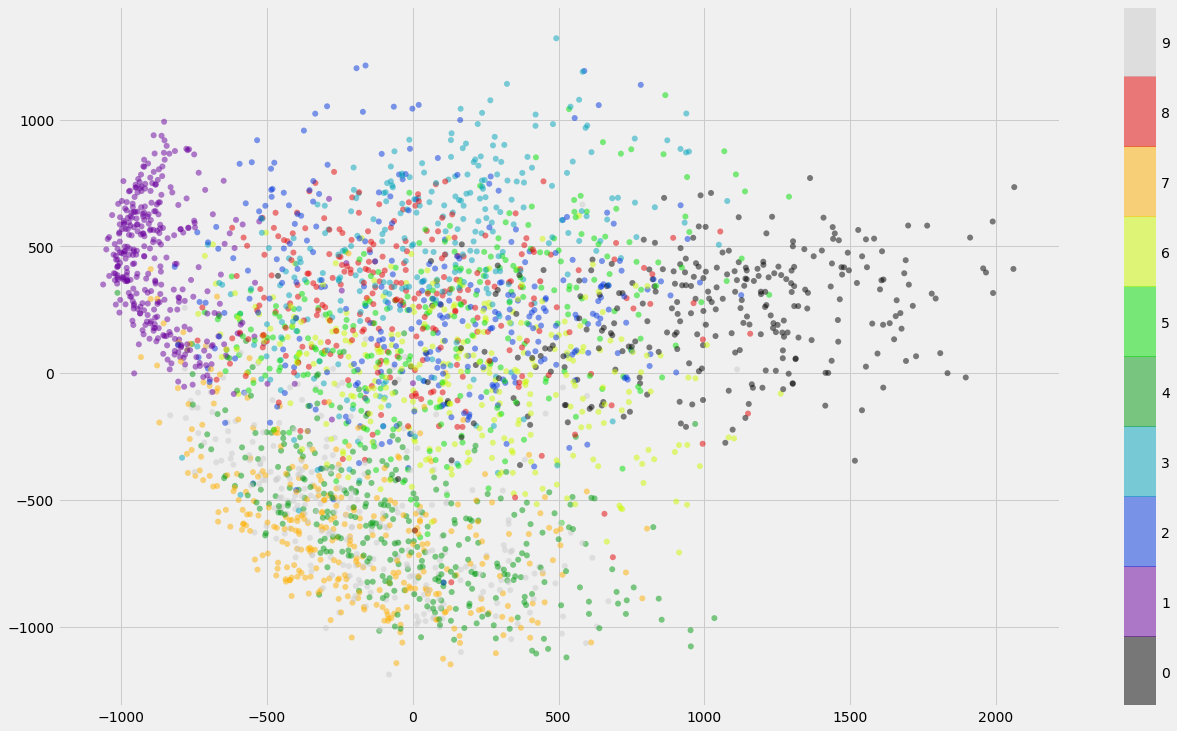

In [63]:
with plt.style.context('fivethirtyeight'):      
    plt.figure(figsize=(20,12))
    plt.scatter(projected[:, 0], projected[:, 1], c=y1, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
    plt.colorbar(ticks=range(10))
    plt.clim(-0.5, 9.5)
plt.show()

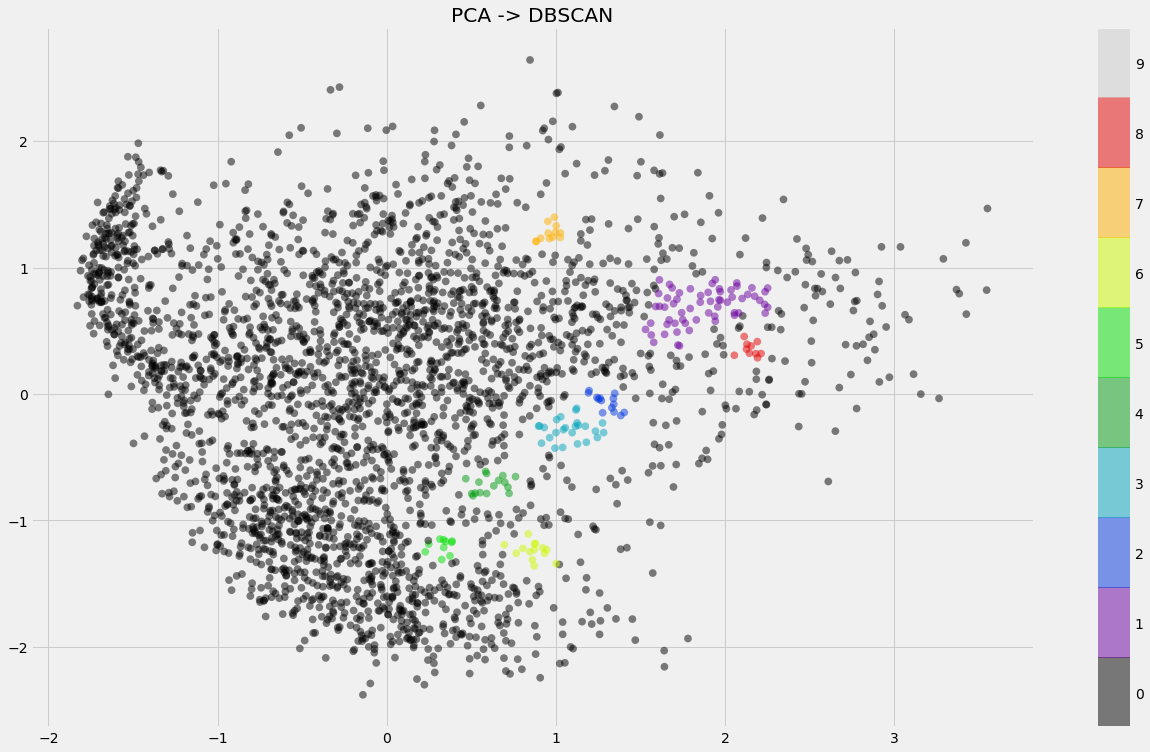

In [64]:
scaled_p = StandardScaler().fit_transform(projected)
db = DBSCAN(eps=0.122, min_samples=10).fit(scaled_p)
labels = db.labels_

with plt.style.context('fivethirtyeight'):  
    plt.figure(figsize=(20,12))
    plt.title('PCA -> DBSCAN')
    plt.scatter(scaled_p[:,0], scaled_p[:,1], c=labels, s=60, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
    plt.colorbar(ticks=range(10))
    plt.clim(-0.5, 9.5)
plt.show()

## 2) Mini-Batch K-Means on the whole dataset

I've chosen Mini Batch K-Means algorithm mostly as an alternative to the K-means algorithm for clustering massive
datasets (in our case 70K samples). The advantage of this algorithm was the good time performance (low computational cost).

In [65]:
kmeansBatch = MiniBatchKMeans(n_clusters = no_digits, random_state = 0)

# Fit the model to the training data
kmeansBatch.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=10,
        n_init=3, random_state=0, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [66]:
kmeansBatch.labels_

array([6, 5, 4, ..., 0, 2, 1])

#### Assigning Cluster Labels

K-means clustering is an unsupervised machine learning method; consequently, the labels assigned by our KMeans algorithm refer to the cluster each array was assigned to, not the actual target integer. To fix this, let's define a few functions that will predict which integer corresponds to each cluster.


In [67]:
def infer_cluster_labels(kmeans, actual_labels):
    
    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

#### Applying the functions written above to our dataset

In [68]:
cluster_labels = infer_cluster_labels(kmeansBatch, y)
X_clusters = kmeansBatch.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print('Predicted values: {}'.format(predicted_labels[:20]))
print('Actual values: {}'.format(y[:20]))

Predicted values: [8 0 9 1 9 2 1 8 1 7 8 1 3 6 1 7 2 1 6 7]
Actual values: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


With the functions defined below, we can now determine the accuracy of our algorithms. Since we are using Mini-Batch K-Means, accuracy is ultimately the most important metric; There are other metrics out there that can be applied directly to the clusters themselves, regardless of the associated labels. Three of these metrics that we will use are inertia, homogeneity and v-measure score.

On our MNIST dataset, we were probably thinking that 10 was the appropriate number of clusters (corresponding to the number of our digits); however, this might not be the case. 

We'll fit the clustering algorithm with several different values of clusters, then evaluate the performance using our metrics.

In [69]:
def calculate_metrics(estimator, data, labels):
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))
    print('V-measure score: {}'.format( metrics.v_measure_score(labels, estimator.labels_)))

In [70]:
clusters = [10, 20, 30, 50, 80, 110, 150, 180, 210]

# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters, init_size = 400, random_state = 0)
    estimator.fit(X)
    
    # print cluster metrics
    calculate_metrics(estimator, X, y)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, y)
    predicted_y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(y, predicted_y)))

Number of Clusters: 10
Inertia: 180198808854.5203
Homogeneity: 0.44422586831174193
V-measure score: 0.44776071820395125
Accuracy: 0.5330714285714285

Number of Clusters: 20
Inertia: 161847553004.8746
Homogeneity: 0.5965054022051248
V-measure score: 0.5209292710856532
Accuracy: 0.6929428571428572

Number of Clusters: 30
Inertia: 152549946377.0651
Homogeneity: 0.6630699363760665
V-measure score: 0.5393139514484957
Accuracy: 0.7477714285714285

Number of Clusters: 50
Inertia: 141869835391.18164
Homogeneity: 0.7209567599417616
V-measure score: 0.5386166036885872
Accuracy: 0.7968285714285714

Number of Clusters: 80
Inertia: 133333571438.297
Homogeneity: 0.7660721296857123
V-measure score: 0.5313959914106293
Accuracy: 0.8385571428571429

Number of Clusters: 110
Inertia: 142406818451.43982
Homogeneity: 0.7255534864080297
V-measure score: 0.504730357688689
Accuracy: 0.8097

Number of Clusters: 150
Inertia: 123123956281.0461
Homogeneity: 0.8098707614774896
V-measure score: 0.5162526364715502
Ac

We'll chose 30 as the preffered number of clusters since we have a good enough v-measure score (that could be improved).

### Comparison between K-Means, Mini-Batch K-Means, Affinity Propagation, Spectral Clustering and Agglomerative Clustering

Time consuming task, but I wanted to see the difference between these algorithms.
Sample size = 10000

In [71]:
algorithms = []
algorithms.append(KMeans(n_clusters=30, random_state=1))
algorithms.append(MiniBatchKMeans(n_clusters=30, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=30, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=30))

data = []
for algo in algorithms:
    algo.fit(X[:10000])
    data.append(({
        'ARI': metrics.adjusted_rand_score(y[:10000], algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y[:10000], algo.labels_,
                                                 average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y[:10000], algo.labels_),
        'Completeness': metrics.completeness_score(y[:10000], algo.labels_),
        'V-measure': metrics.v_measure_score(y[:10000], algo.labels_),
        'Silhouette': metrics.silhouette_score(X[:10000], algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'MiniBatch K-means','Affinity', 
                              'Spectral', 'Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.293451,0.549352,0.680448,0.463550,0.551437,0.065005
MiniBatch K-means,0.295016,0.527749,0.649877,0.447388,0.529949,0.060224
Affinity,0.032022,0.439831,0.890184,0.328219,0.479604,0.050260
Spectral,0.397890,0.672928,0.817284,0.574145,0.674472,0.040850
Agglomerative,0.353727,0.623830,0.767706,0.527858,0.625580,0.041543


Spectral Clustering algorithm seems to have a higher V-measure score, so we'll carry on with it.

## 3) Spectral Clustering

In [72]:
# Normalizing the dataset
X1, y1 = np.float32(X[:70000])/255., np.float32(y[:70000])
X1, y1 = shuffle(X1,y1)


# We'll use only 10k samples, otherwise we'll wait too much 
X_train, y_train = np.float32(X1[:10000])/255., np.float32(y1[:10000]) 

X_test, y_test = np.float32(X1[60000:])/255., np.float32(y1[60000:])

print(X.shape)

(70000, 784)


#### - Spectral Embedding of MNIST dataset

In [73]:
print("Computing Spectral embedding")
X_spec = manifold.SpectralEmbedding(n_components=2, affinity='nearest_neighbors', gamma=None, random_state=None, eigen_solver=None, n_neighbors=5).fit_transform(X_train)
print("Spectral Embedding finished.")

Computing Spectral embedding
Spectral Embedding finished.


#### - Applying Spectral Clustering

In [74]:
spectral = cluster.SpectralClustering(n_clusters=10, eigen_solver='arpack', affinity="nearest_neighbors")

Xs = spectral.fit(X_spec)
y_pred = spectral.fit_predict(X_spec)

#### - Clustering Metrics

Completeness score 0.5899644968992553
V-measure score 0.5701804607407891


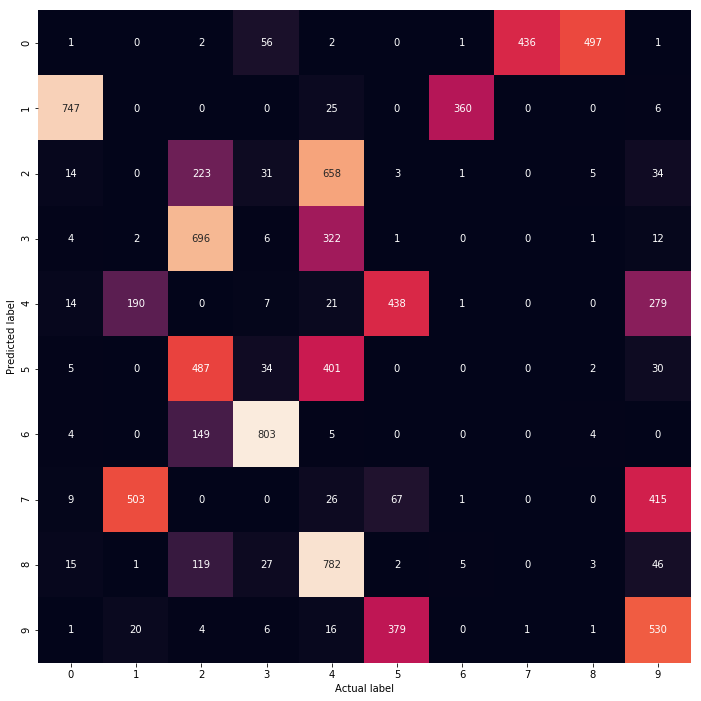

In [75]:
print('Completeness score {}'.format(completeness_score(y_train, y_pred)))
print('V-measure score {}'.format(metrics.v_measure_score(y_train, y_pred)))
plt.figure(figsize=(18,12))
sns.heatmap(confusion_matrix(y_train, y_pred), square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

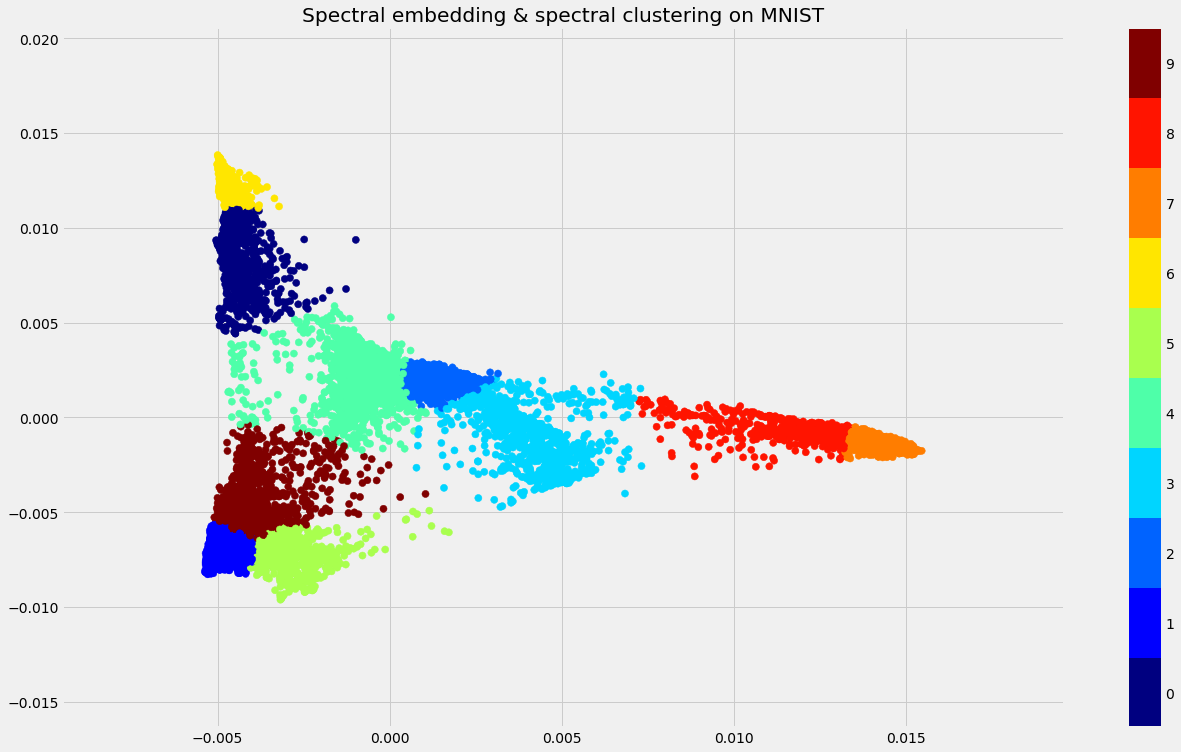

In [76]:
with plt.style.context('fivethirtyeight'):      
    plt.figure(figsize=(20,12))
    plt.title("Spectral embedding & spectral clustering on MNIST")
    plt.scatter(X_spec[:, 0], X_spec[:, 1], c=y_pred, s=50, cmap=plt.cm.get_cmap("jet", 10))
    plt.colorbar(ticks=range(10))
    plt.clim(-0.5, 9.5)
plt.show()


##### Isomap projection

In [77]:
print("Computing Isomap embedding")
X_iso = manifold.Isomap(n_neighbors=5, n_components=2).fit_transform(X_train)
print("Isomap Embedding finished.")

Computing Isomap embedding
Isomap Embedding finished.


In [78]:
Xiso = spectral.fit(X_iso)
y_pred = spectral.fit_predict(X_iso)

Completeness score 0.4020541784601811
V-measure score 0.4010392874630962


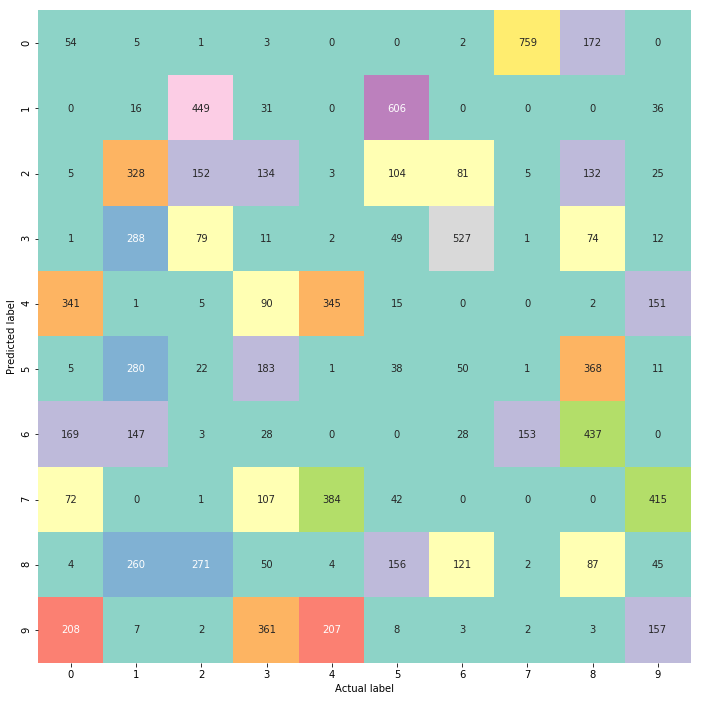

In [79]:
print('Completeness score {}'.format(completeness_score(y_train, y_pred)))
print('V-measure score {}'.format(metrics.v_measure_score(y_train, y_pred)))
plt.figure(figsize=(18,12))
sns.heatmap(confusion_matrix(y_train, y_pred), square=True, annot=True, cmap='Set3', fmt='d', cbar=False)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

The v-measure score is lower than the v-measure score in the case of Spectral Embedding.

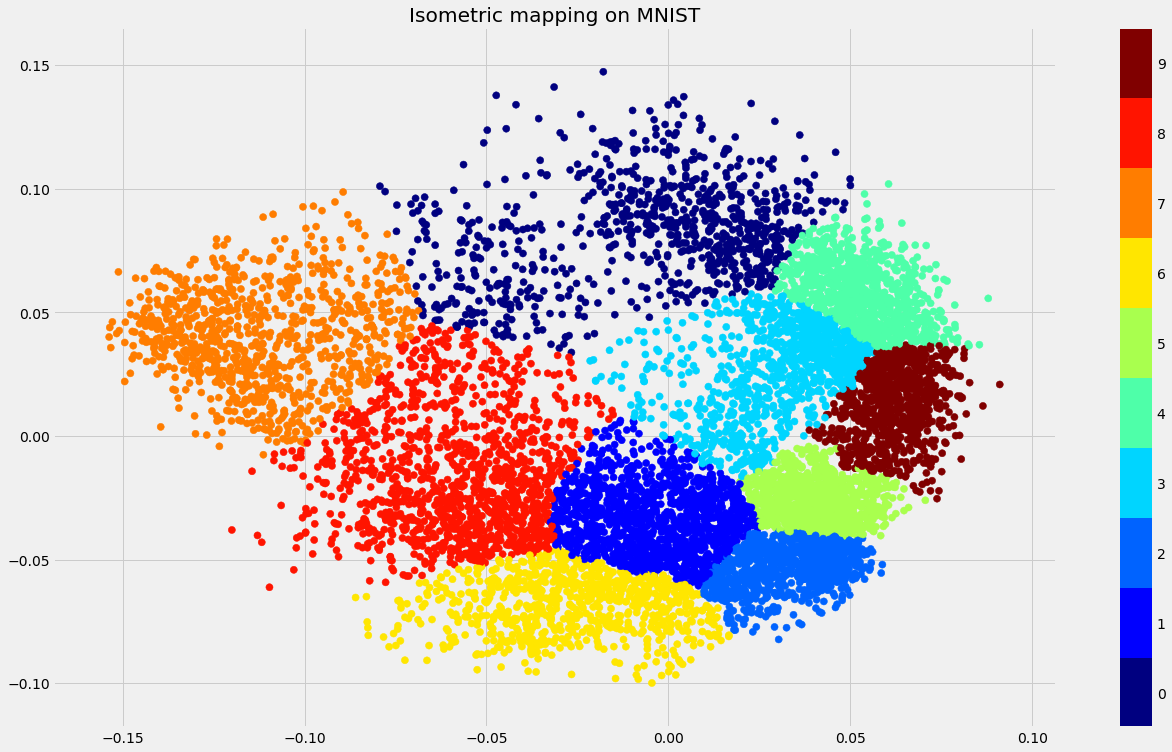

In [80]:
with plt.style.context('fivethirtyeight'):  
    plt.figure(figsize=(20,12))
    plt.title("Isometric mapping on MNIST")
    plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y_pred, s=50, cmap=plt.cm.get_cmap("jet", 10))
    plt.colorbar(ticks=range(10))
    plt.clim(-0.5, 9.5)
plt.show()

## 4) Kernel Principal Component Analysis (Kernel PCA)

PCA is a linear method. That is it can only be applied to datasets which are linearly separable. However, if we want to use it to non-linear datasets, we might get a result which may not be the optimal dimensionality reduction. Kernel PCA uses a kernel function to project dataset into a higher dimensional feature space, where it is linearly separable.

We'll keep only 15k training samples due to the kPCA memory requirements. We'll also keep only 300 components.

In [81]:
X_train, y_train = np.float32(X1[:15000])/255., np.float32(y1[:15000])
X_test, y_test = np.float32(X1[60000:])/ 255., np.float32(y1[60000:])

kpca = KernelPCA(kernel="rbf", n_components=300 , gamma=1)
X_kpca = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)
print (kpca)
print(X_kpca.shape)

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=1, kernel='rbf',
     kernel_params=None, max_iter=None, n_components=300, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0)
(15000, 300)


In [82]:
lda = LinearDiscriminantAnalysis()
print (lda)

X_lda = lda.fit_transform(X_kpca,y_train)
X_test = lda.transform(X_test)
print(X_lda.shape)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
(15000, 9)


#### - Performing kNN classification

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
---------(5) Cross validation accuracy--------
[0.9124792  0.90875791 0.914      0.92125459 0.9115192 ]



---------Test-set dimensions after PCA--------
(10000, 9)
--------------------Results-------------------
Completeness score 0.7925334977032563
V-measure score 0.792283564374322


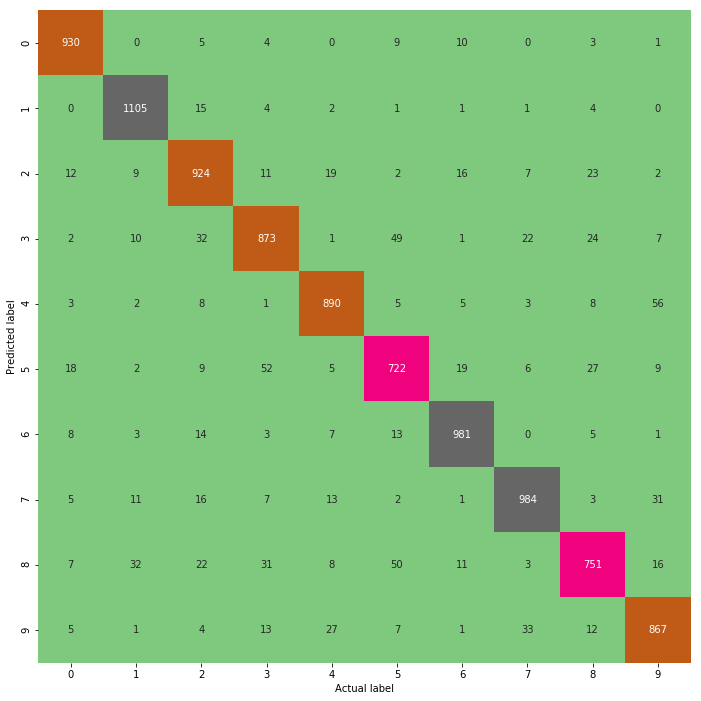

In [83]:
#kNN classification
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_lda, y_train)

print (clf)

print("---------(5) Cross validation accuracy--------")
print(cross_val_score(clf, X_lda,y_train, cv=5))

print('\n\n')

print("---------Test-set dimensions after PCA--------")
print(X_test.shape)

expected = y_test
predicted = clf.predict(X_test)

print("--------------------Results-------------------")
print('Completeness score {}'.format(metrics.completeness_score(expected, predicted)))
print('V-measure score {}'.format(metrics.v_measure_score(expected, predicted)))
plt.figure(figsize=(18,12))
sns.heatmap(confusion_matrix(expected, predicted), square=True, cmap='Accent',annot=True, fmt='d', cbar=False)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

#### - Performing Nereast Centroid classification

NearestCentroid(metric='euclidean', shrink_threshold=None)
---------(5) Cross validation accuracy--------
[0.88419301 0.87345987 0.876      0.87520854 0.87946578]
---------Test-set dimensions after PCA--------
(10000, 9)
--------------------Results-------------------
Completeness score 0.7308105024797686
V-measure score 0.7304564225758118


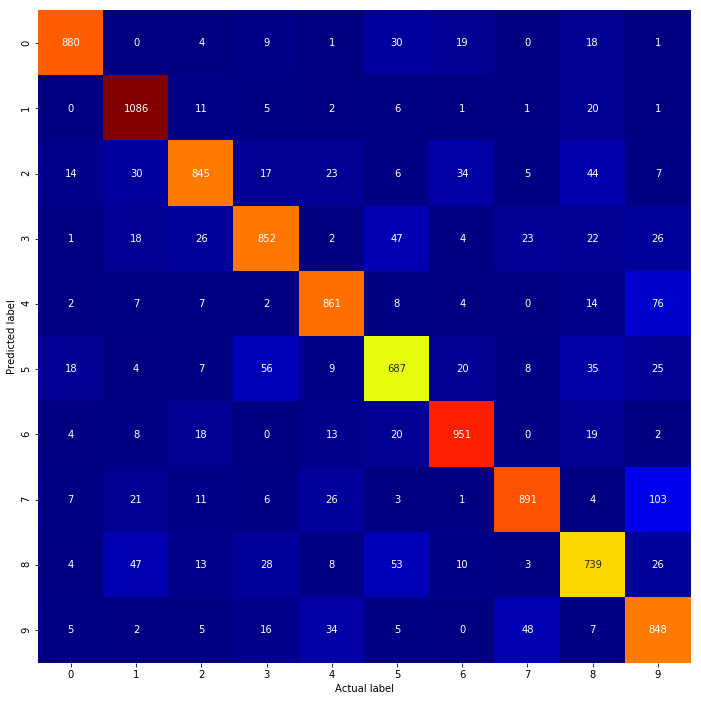

In [84]:
NC = NearestCentroid()
NC.fit(X_lda, y_train)
NearestCentroid(metric='euclidean', shrink_threshold=None)
print(NC)



print("---------(5) Cross validation accuracy--------")
print(cross_val_score(NC, X_lda,y_train, cv=5))


print("---------Test-set dimensions after PCA--------")
print(X_test.shape)

expected = y_test
predicted = NC.predict(X_test)

print("--------------------Results-------------------")
print('Completeness score {}'.format(metrics.completeness_score(expected, predicted)))
print('V-measure score {}'.format(metrics.v_measure_score(expected, predicted)))
plt.figure(figsize=(18,12))
sns.heatmap(confusion_matrix(expected, predicted), square=True, annot=True, cmap='jet', fmt='d', cbar=False)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

## 5) tSNE

t-Distributed Stochastic Neighbor Embedding (t-SNE) represents a non-linear technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. 

In [85]:
test_x, train_x, test_y, train_y = train_test_split(X, y, test_size=1/7.0, random_state=0)
print(train_x.shape)
print(test_x.shape)

(10000, 784)
(60000, 784)


In [86]:
tsne = TSNE().fit_transform(train_x)

X_tsne = (tsne.T[0]).T
y_tsne = (tsne.T[1]).T


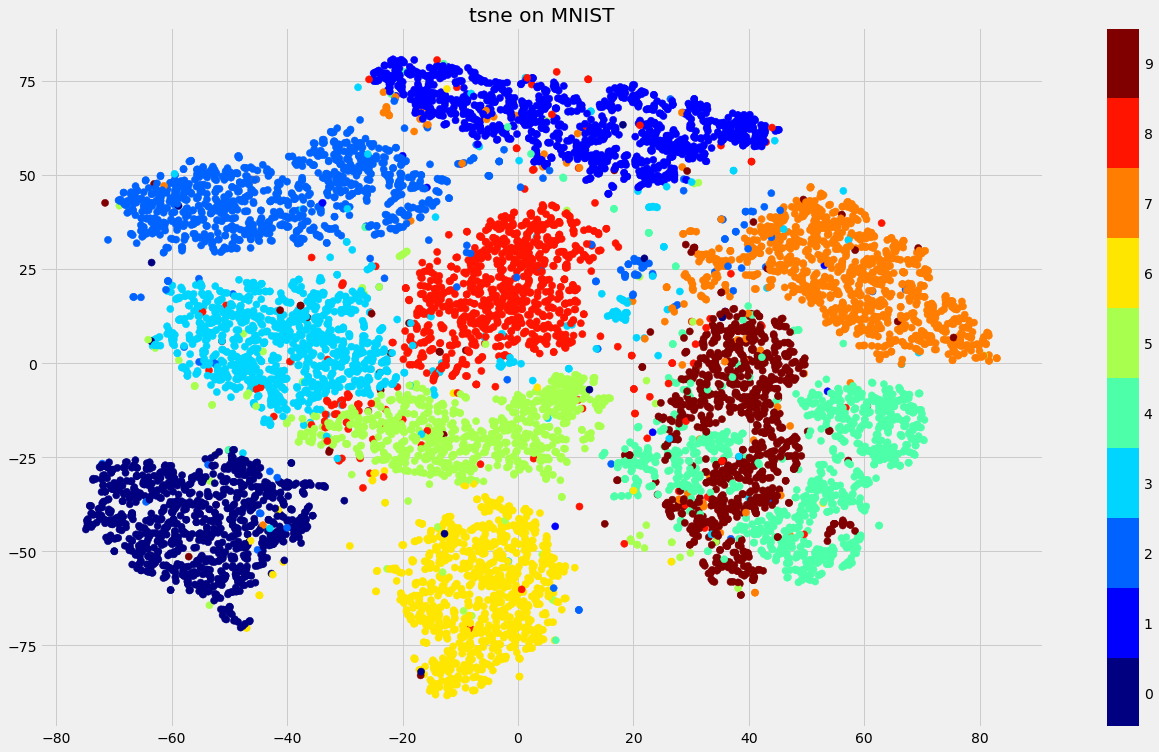

In [87]:
with plt.style.context('fivethirtyeight'):  
    plt.figure(figsize=(20,12))
    plt.title("tsne on MNIST")
    plt.scatter(X_tsne, y_tsne, c=train_y, s=50, cmap=plt.cm.get_cmap("jet", 10))
    plt.colorbar(ticks=range(10))
    plt.clim(-0.5, 9.5)
plt.show()

#### Comparing different algorithms on tsne

In [88]:
XAGG_tsne = AgglomerativeClustering(n_clusters = 10).fit_predict(tsne)
XKM_tsne = KMeans(n_clusters = 10, n_jobs=-1).fit_predict(tsne)
XBir_tsne = Birch(n_clusters=10).fit_predict(tsne)
XSpe_tsne = SpectralClustering(n_clusters=10, random_state=1, affinity='nearest_neighbors').fit_predict(tsne)


print('V-score for Agglomerative Clustering is {}'.format(metrics.v_measure_score(train_y, XAGG_tsne)))
print('V-score for K-Means Clustering is {}'.format(metrics.v_measure_score(train_y, XKM_tsne)))
print('V-score for Birch Clustering is {}'.format(metrics.v_measure_score(train_y, XBir_tsne)))
print('V-score for Spectral Clustering is {}'.format(metrics.v_measure_score(train_y, XSpe_tsne)))

V-score for Agglomerative Clustering is 0.7535739297823169
V-score for K-Means Clustering is 0.7524584053364496
V-score for Birch Clustering is 0.7734156561809847
V-score for Spectral Clustering is 0.7079358414936445


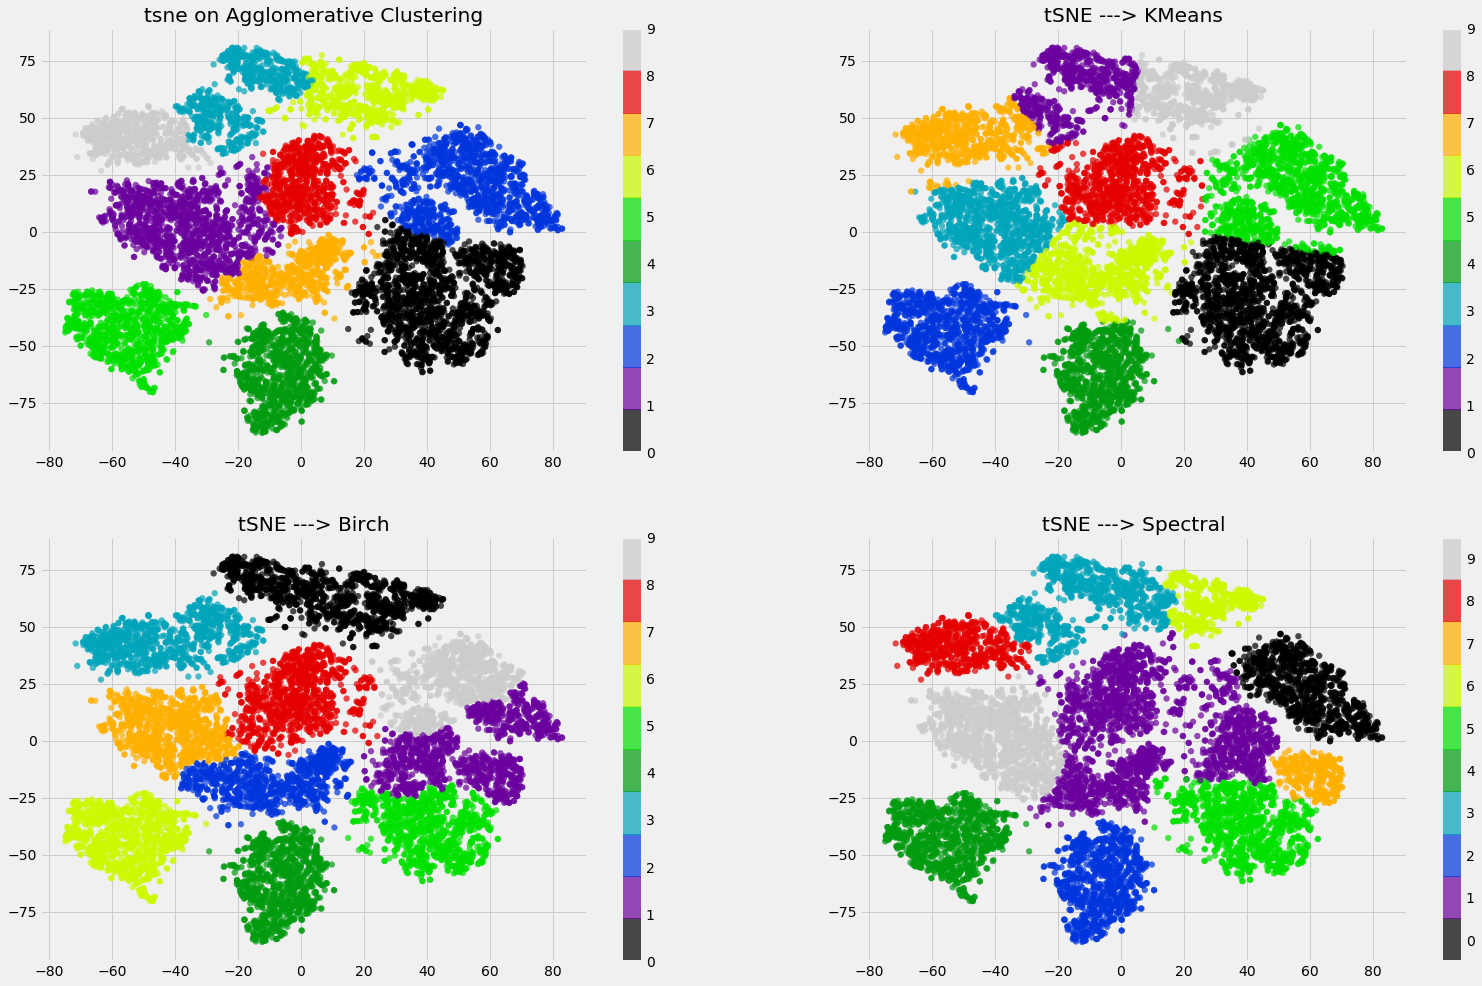

In [101]:
with plt.style.context('fivethirtyeight'):  
    plt.figure(figsize=(24,16))
    plt.subplot(2,2,1)
    plt.title("tsne on Agglomerative Clustering")
    plt.scatter(X_tsne, y_tsne, c=XAGG_tsne, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
    plt.colorbar(ticks=range(10))
    plt.subplot(2,2,2)
    plt.scatter(X_tsne, y_tsne, c=XKM_tsne, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
    plt.colorbar(ticks=range(10))
    plt.title('tSNE ---> KMeans')
    plt.subplot(2,2,3)
    plt.scatter(X_tsne, y_tsne, c=XBir_tsne, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
    plt.colorbar()
    plt.title('tSNE ---> Birch')
    plt.subplot(2,2,4)
    plt.scatter(X_tsne, y_tsne, c=XSpe_tsne, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
    plt.title("tSNE ---> Spectral")
    plt.colorbar(ticks=range(10))
    plt.clim(-0.5, 9.5)

plt.show()

This is already a significant improvement over the PCA visualization we created earlier. We can see that the digits are very clearly clustered in their own little group. From our plots, we conclude that tSNE on Agglomerative and Birch Clustering are the best ones, with the digits clearly grouped in their own groups.

### 6) ** CNN (Convolutional Neural Networks)

Since we've discussed a little bit about Deep Learning in the last course, I wanted to familiarize with this concept and to try another approach to this problem: Convolutional Neural Networks. 

In [90]:
training_size = int(len(X)*0.25)
X_validation = X[:training_size].reshape(int(len(X)*0.25), 28, 28, 1)
y_validation = y[:training_size]
X_training = X[training_size:].reshape(len(X)-int(len(X)*0.25), 28, 28, 1)
y_training = y[training_size:]

##### Get the Image shape

In [91]:
print(X_validation.shape, X_training.shape)

(17500, 28, 28, 1) (52500, 28, 28, 1)


##### One-Hot Encoding

In [92]:
y_val_1h = to_categorical(y_validation)
y_training_1h = to_categorical(y_training)

print(y_val_1h[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### Building the CNN model

In [93]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu',input_shape=(28,28, 1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [94]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [95]:
hist = model.fit(X_training, y_training_1h, validation_data=(X_validation, y_val_1h), epochs = 3)

Train on 52500 samples, validate on 17500 samples
Epoch 1/3
52500/52500 [==============================] - 53s 1ms/step - loss: 0.2986 - accuracy: 0.9463 - val_loss: 0.1208 - val_accuracy: 0.9637
Epoch 2/3
52500/52500 [==============================] - 52s 994us/step - loss: 0.0722 - accuracy: 0.9786 - val_loss: 0.1023 - val_accuracy: 0.9698
Epoch 3/3
52500/52500 [==============================] - 52s 998us/step - loss: 0.0499 - accuracy: 0.9850 - val_loss: 0.1175 - val_accuracy: 0.9702


#### Visualizing the model's accuracy

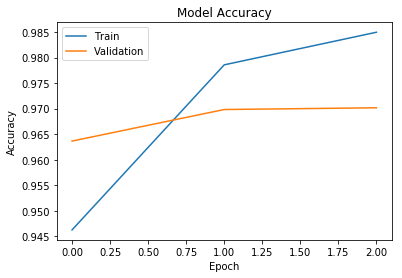

In [96]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

In [97]:
predictions = model.predict(X_validation)
predictions

array([[1.8527023e-13, 2.8380277e-13, 1.2165189e-12, ..., 7.1199828e-13,
        2.4460585e-08, 1.9840052e-12],
       [9.9999797e-01, 1.0326845e-11, 3.2606138e-07, ..., 8.7225322e-17,
        2.4646953e-09, 9.9946380e-09],
       [3.1194069e-16, 1.6826693e-06, 1.1089038e-06, ..., 4.0643548e-07,
        3.7402348e-08, 3.1558175e-06],
       ...,
       [1.3299738e-10, 1.3875884e-10, 3.2257540e-06, ..., 9.9999666e-01,
        7.9597738e-11, 3.6419415e-08],
       [5.1078763e-10, 1.7272810e-12, 2.0969310e-11, ..., 5.8237810e-11,
        7.8417474e-11, 7.7217148e-12],
       [2.1645846e-08, 5.6957870e-09, 4.2344900e-04, ..., 2.1784108e-11,
        9.9954283e-01, 5.4056102e-08]], dtype=float32)

In [98]:
print('Actual:',y_validation[:4])
print('Predicted:',np.argmax(predictions[:4], axis = 1))

Actual: [5 0 4 1]
Predicted: [5 0 4 1]


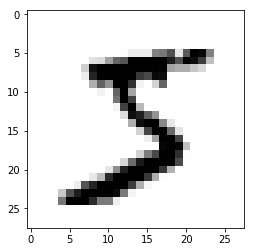

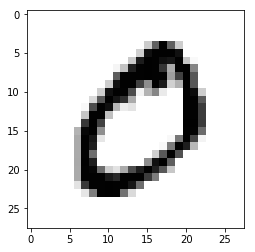

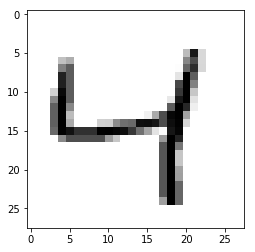

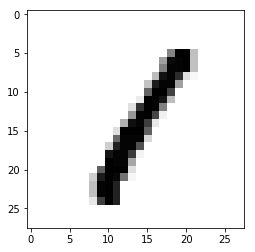

In [99]:
for i in range(4):
  plt.imshow(X_validation[i].reshape(28, 28), cmap=binary, interpolation="nearest")
  plt.axis('on')
  plt.show()

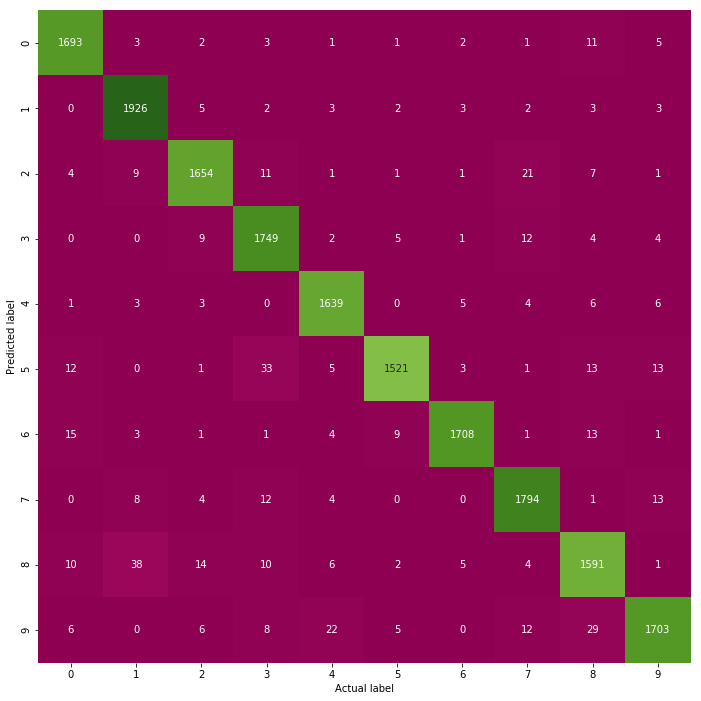

In [100]:
plt.figure(figsize=(18,12))
sns.heatmap(confusion_matrix(np.argmax(predictions, axis = 1), y_validation), square=True, cmap="PiYG", annot=True, fmt='d', cbar=False)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()


In [107]:
print(classification_report(np.argmax(predictions, axis = 1), y_validation))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1722
           1       0.97      0.99      0.98      1949
           2       0.97      0.97      0.97      1710
           3       0.96      0.98      0.97      1786
           4       0.97      0.98      0.98      1667
           5       0.98      0.95      0.97      1602
           6       0.99      0.97      0.98      1756
           7       0.97      0.98      0.97      1836
           8       0.95      0.95      0.95      1681
           9       0.97      0.95      0.96      1791

   micro avg       0.97      0.97      0.97     17500
   macro avg       0.97      0.97      0.97     17500
weighted avg       0.97      0.97      0.97     17500

